In [1]:
import csv

def get_mapping(path):
    exampleFile = open(path, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = dict(exampleReader)
    exampleFile.close()
    return exampleData

In [2]:
#q1
mapping = get_mapping("small_mapping.csv")
mapping

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [3]:
#q2
mapping["nm0001219"]

'Gary Fleder'

In [4]:
#q3
ret = []
for key, val in mapping.items():
    if key[0:2] == "nm":
        ret.append(val)
        
ret        

['John Cusack',
 'Mel Gibson',
 'Dustin Hoffman',
 'Danny Glover',
 'Gene Hackman',
 'Gary Busey',
 'Richard Donner',
 'Gary Fleder',
 'Mitchell Ryan']

In [5]:
#q4
ret = []
for key, val in mapping.items():
    loc = val.find(' ')
    if loc != -1 and val[loc+1] == 'G':
        ret.append(key)
ret 

['nm0000154', 'nm0000418']

In [6]:
import csv

# copied from https://automatetheboringstuff.com/chapter14/
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    return exampleData

# Convert CSV to a list of dicts
def load_csv_to_dicts(path):
    rows = process_csv(path)
    header = rows[0]
    rows = rows[1:]
    
    dict_list = []
    for row in rows:
        new_row = {}
        for i in range(len(header)):
            new_row[header[i]] = row[i]
        dict_list.append(new_row)
    return dict_list
    
def load_csv_to_dicts_1(path):
    with open(path) as f:
        a = [{k: v for k, v in row.items()}
            for row in csv.DictReader(f, skipinitialspace=True)]
    return a

def get_raw_movies(path):
    exampleFile = open(path, encoding="utf-8")
    exampleReader = csv.DictReader(exampleFile, skipinitialspace=True)
    a = []
    for row in exampleReader:
        d = {}
        d["title"] = row["title"]
        d["year"] = int(row["year"])
        d["rating"] = float(row["rating"])
        d["directors"] = (row["directors"]).split(",")
        d["actors"] = (row["actors"]).split(",")
        d["genres"] = (row["genres"]).split(",")
        a.append(d)
    exampleFile.close()
    return a

In [7]:
#q5
movie = get_raw_movies("small_movies.csv")
movie

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [8]:
#q6
len(movie[1]["actors"])

4

In [9]:
#q7
movie[0]["actors"][0]

'nm0000131'

In [10]:
def get_movies(movies_path, mapping_path):
    mapping = get_mapping(mapping_path)
    exampleFile = open(movies_path, encoding="utf-8")
    exampleReader = csv.DictReader(exampleFile, skipinitialspace=True)
    a = []
    for row in exampleReader:
        d = {}
        d["title"] = mapping[row["title"]]
        d["year"] = int(row["year"])
        d["rating"] = float(row["rating"])
        d["directors"] = [mapping[direct] for direct in (row["directors"]).split(",")]
        d["actors"] = [mapping[actor] for actor in (row["actors"]).split(",")] 
        # actors = (row["actors"]).split(",")
        # d["actors"] = [mapping[actor] for actor in actors] 
        d["genres"] = (row["genres"]).split(",")
        a.append(d)
    exampleFile.close()
    return a


In [11]:
#q8
small = get_movies("small_movies.csv", "small_mapping.csv")
small[1]["title"]

'Lethal Weapon'

In [12]:
#q9
small[0]["actors"]

['John Cusack', 'Gene Hackman', 'Dustin Hoffman']

In [13]:
#q10
small[-1]["directors"]

['Richard Donner']

In [14]:
#q11
movies = get_movies("movies.csv", "mapping.csv")
movies[-3:]
# movies[-4:-1]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [15]:
#q12
movies[:2]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']}]

In [16]:
#q13
# you are not allowed to change this function
def filter_movies_by_year(movies, year):
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies

filter_movies_by_year(movies.copy(), 1929)

[{'title': 'Redskin',
  'year': 1929,
  'rating': 7.0,
  'directors': ['Victor Schertzinger'],
  'actors': ['Richard Dix', 'Tully Marshall', 'George Regas'],
  'genres': ['Adventure', 'Drama', 'Western']},
 {'title': 'The Girl in the Show',
  'year': 1929,
  'rating': 6.5,
  'directors': ['Edgar Selwyn'],
  'actors': ['Raymond Hackett', 'Edward J. Nugent'],
  'genres': ['Comedy']},
 {'title': 'Atlantic',
  'year': 1929,
  'rating': 5.5,
  'directors': ['Ewald André Dupont'],
  'actors': ['Franklin Dyall', 'John Stuart'],
  'genres': ['Drama']}]

In [28]:
#q14
filter_movies_by_year(movies.copy(), 1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [49]:
#q15
unique_name = []
for row in movies:
    for actor in row["actors"]:
        if actor not in unique_name:
            unique_name.append(actor)
len(unique_name)

2605

In [53]:
#q16
unique_genre = []
for row in movies:
    for genre in row["genres"]:
        if genre not in unique_genre:
            unique_genre.append(genre)
len(unique_genre)

18

In [39]:
#q17
smallest = " "
for row in movies:
    smallest= row["title"] if row["title"] > smallest else smallest
smallest

'Zorba the Greek'

In [40]:
#q18
rates = 0
for row in movies:
    rates += row["rating"]
rates/len(movies)

6.401659528907912

In [42]:
#q19
highest_rate_movie = " "
highest_rate = 0
for row in movies:
    if row["rating"] > highest_rate:
        highest_rate = row["rating"]
        highest_rate_movie = row["title"]
highest_rate_movie

'The Godfather'

In [45]:
#q20
highest_year_movie = " "
highest_year = 2500
for row in movies:
    if row["year"] < highest_year:
        highest_year = row["year"]
        highest_year_movie = row["title"]
highest_year_movie

'Shoulder Arms'

# part B

In [69]:
def bucketize(movie_list, movie_key):
    buck = {}
    for row in movie_list:
        keys = row[movie_key]
        if isinstance(keys, list):
            for key in row[movie_key]:
                if key in buck:
                    buck[key].append(row)
                else:
                    buck[key] = [row]
        else:
            if keys in buck:
                buck[keys].append(row)
            else:
                buck[keys] = [row]
    return buck        

In [70]:
#q21
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [71]:
#q22
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [73]:
#q23
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [74]:
#q24
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [75]:
#q25
len(bucketize(small, "directors"))

2

In [76]:
#q26
len(bucketize(movies, "directors"))

1247

In [96]:
#q27
buck_genres = bucketize(movies, "genres")
movies_genre = {genres: len(buck_genres[genres]) for genres in buck_genres}
movies_genre

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

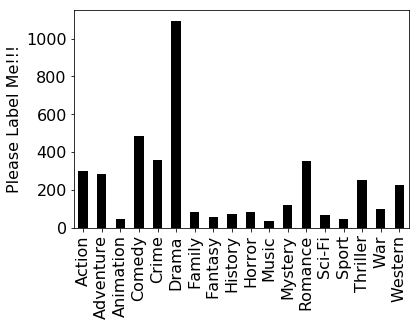

In [97]:
#q28
import matplotlib, pandas

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)
    
plot_dict(movies_genre)    

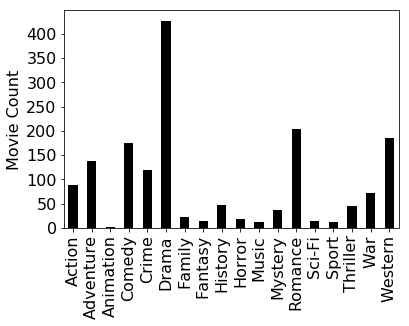

In [123]:
#q29
def filter_before_year(movies, year):
    return [row for row in movies if row["year"] < year]

def filter_after_year(movies, year):
    return [row for row in movies if row["year"] >= year]

def filter_year(movies, year_1, year_2):
    year_1 = 0 if year_1 is None else year_1
    year_2 = 5000 if year_2 is None else year_2
    return [row for row in movies if year_1 <= row["year"] <= year_2]

def bucket_counts(movies, key):
    buck_keys = bucketize(movies, key)
    return {keys: len(buck_keys[keys]) for keys in buck_keys}

plot_dict(bucket_counts(filter_before_year(movies, 1970), "genres"), "Movie Count")

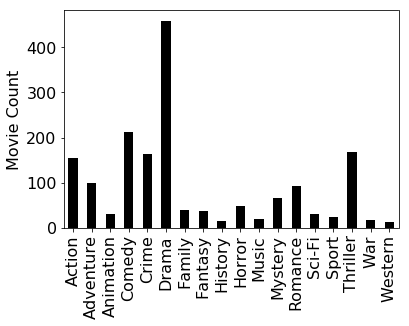

In [124]:
#q30
plot_dict(bucket_counts(filter_after_year(movies, 1990), "genres"), "Movie Count")

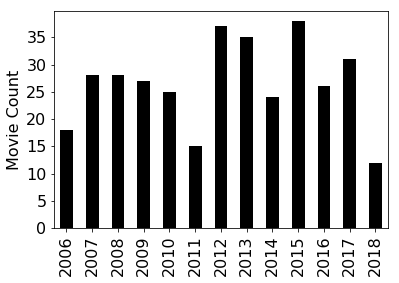

In [129]:
#q31
plot_dict(bucket_counts(filter_year(movies, 2006, None), "year"), "Movie Count")

In [164]:
#q32
def dict_span(movies, key, year):
    buck_keys = bucketize(movies, key)
    span_dict = {}
    ret = {}
    for k, v in buck_keys.items():
        span_dict[k] = [5000, 0]
        for i in range(len(v)):
            x = v[i]["year"]
            span_dict[k] = [min(x,span_dict[k][0]), max(x,span_dict[k][1])]
        # span
        span_dict[k] = span_dict[k][1] - span_dict[k][0]
        if span_dict[k] >= year:
            ret[k] = span_dict[k]
    return ret    

dict_span(movies, "actors", 45)

{'Robert De Niro': 49,
 'Kurt Russell': 50,
 'John Wayne': 46,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Henry Fonda': 46,
 'Glenn Ford': 52,
 'Jeff Bridges': 48,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'Marlon Brando': 49,
 'Tony Curtis': 45,
 'Ernest Borgnine': 47,
 'Rod Steiger': 45,
 'George Burns': 60,
 'Bruce Dern': 45,
 'Dean Stockwell': 53}

In [166]:
#q33
dict_span(movies, "directors", 25)

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'J. Lee Thompson': 28,
 'Henry Hathaway': 36,
 'John Ford': 25,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'John Sturges': 25,
 'Richard Fleischer': 32,
 'Don Siegel': 27,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Burt Kennedy': 25,
 'William A. Graham': 25,
 'Richard Thorpe': 29,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [171]:
#q34
def row_ranking(row):
    return row["span"]

def top_key_span(movies, key, slice):
    buck_keys = bucketize(movies, key)
    span_dict = {}
    ret = []
    for k, v in buck_keys.items():
        span_dict[k] = [5000, 0]
        for i in range(len(v)):
            x = v[i]["year"]
            span_dict[k] = [min(x,span_dict[k][0]), max(x,span_dict[k][1])]
        # span
        span_dict[k] = span_dict[k][1] - span_dict[k][0]
        ret.append({"name":k,"span":span_dict[k]})
    ret.sort(key=row_ranking,reverse=True)
    return ret[:slice]

top_key_span(movies,"actors",10)

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [176]:
#q35
top_key_span(movies,"directors",21)

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31},
 {'name': 'Cecil B. DeMille', 'span': 30},
 {'name': 'Lee H. Katzin', 'span': 30},
 {'name': 'John Huston', 'span': 30},
 {'name': 'Robert Siodmak', 'span': 30},
 {'name': 'Richard Thorpe', 'span': 29},
 {'name': 'J. Lee Thompson', 'span': 28},
 {'name': 'Don Siegel', 'span': 27},
 {'name': 'John Ford', 'span': 25},
 {'name': 'John Sturges', 'span': 25},
 {'name': 'Burt Kennedy', 'span': 25},
 {'name': 'William A. Graham', 'span': 25}]

In [201]:
#q36
import statistics
def row_best(row):
    return row["rating"]

def best_n_key(movies, key, slice):
    buck_keys = bucketize(movies, key)
    ret = []
    for k, v in buck_keys.items():
        rate_dict = []
        for i in range(len(v)):
            rate_dict.append(v[i]["rating"])
        ret.append({"name":k,"rating":statistics.median(rate_dict),"count":len(rate_dict)})
    ret.sort(key=row_best,reverse=True)
    return ret[:slice]

best_n_key(movies, "actors", 9)

[{'name': 'Heath Ledger', 'rating': 9.0, 'count': 1},
 {'name': 'John Fiedler', 'rating': 8.9, 'count': 1},
 {'name': 'Aldo Giuffrè', 'rating': 8.9, 'count': 1},
 {'name': 'Steven Williams', 'rating': 8.8, 'count': 1},
 {'name': 'Daniel Roebuck', 'rating': 8.8, 'count': 1},
 {'name': 'Joseph Gordon-Levitt', 'rating': 8.8, 'count': 1},
 {'name': 'Miyu Irino', 'rating': 8.6, 'count': 1},
 {'name': 'Andrew Kevin Walker', 'rating': 8.6, 'count': 1},
 {'name': 'Ken Watanabe', 'rating': 8.55, 'count': 2}]

In [202]:
#q37
best_n_key(movies, "directors", 12)

[{'name': 'James Marlowe', 'rating': 8.8, 'count': 1},
 {'name': 'Kirk Wise', 'rating': 8.6, 'count': 1},
 {'name': 'David Fincher', 'rating': 8.6, 'count': 1},
 {'name': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'name': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'name': 'Adrian Molina', 'rating': 8.4, 'count': 1},
 {'name': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'name': 'Sergio Leone', 'rating': 8.3, 'count': 7},
 {'name': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'name': 'Moustapha Akkad', 'rating': 8.2, 'count': 1},
 {'name': 'Andrew Grieve', 'rating': 8.2, 'count': 6},
 {'name': 'Danny Boyle', 'rating': 8.2, 'count': 1}]

In [203]:
#q38
def best_n_key_constr(movies, key, slice, constr):
    buck_keys = bucketize(movies, key)
    ret = []
    for k, v in buck_keys.items():
        rate_dict = []
        for i in range(len(v)):
            rate_dict.append(v[i]["rating"])
        if len(rate_dict) >= constr:
            ret.append({"name":k,"rating":statistics.median(rate_dict),"count":len(rate_dict)})
    ret.sort(key=row_best,reverse=True)
    return ret[:slice]
best_n_key_constr(movies, "actors", 14, 5)

[{'name': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'name': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'name': 'Robert Lindsay', 'rating': 8.2, 'count': 6},
 {'name': 'Charles Chaplin', 'rating': 8.149999999999999, 'count': 10},
 {'name': 'Bradley Cooper', 'rating': 7.3, 'count': 5},
 {'name': 'Joe Pesci', 'rating': 7.2, 'count': 7},
 {'name': 'Robin Williams', 'rating': 7.2, 'count': 5},
 {'name': 'Kirk Douglas', 'rating': 7.15, 'count': 12},
 {'name': 'Ward Bond', 'rating': 7.1, 'count': 10},
 {'name': 'Gregory Peck', 'rating': 7.1, 'count': 5},
 {'name': 'Tom Hanks', 'rating': 7.1, 'count': 6},
 {'name': 'Al Pacino', 'rating': 7.050000000000001, 'count': 8},
 {'name': 'Ben Johnson', 'rating': 7.050000000000001, 'count': 6},
 {'name': 'Charles Coburn', 'rating': 7.0, 'count': 9}]

In [204]:
#q39
best_n_key_constr(movies, "actors", 16, 30)

[{'name': 'Henry Fonda', 'rating': 6.9, 'count': 77},
 {'name': 'Mickey Rooney', 'rating': 6.7, 'count': 82},
 {'name': 'Anthony Quinn', 'rating': 6.7, 'count': 79},
 {'name': 'Brian Donlevy', 'rating': 6.7, 'count': 47},
 {'name': 'Robert Mitchum', 'rating': 6.65, 'count': 74},
 {'name': 'Glenn Ford', 'rating': 6.6, 'count': 74},
 {'name': 'George Sanders', 'rating': 6.6, 'count': 74},
 {'name': 'Robert De Niro', 'rating': 6.55, 'count': 74},
 {'name': 'Randolph Scott', 'rating': 6.5, 'count': 76},
 {'name': 'Jeff Bridges', 'rating': 6.5, 'count': 59},
 {'name': 'Ned Beatty', 'rating': 6.45, 'count': 50},
 {'name': 'Kurt Russell', 'rating': 6.4, 'count': 46},
 {'name': 'John Wayne', 'rating': 6.4, 'count': 130},
 {'name': 'John Cusack', 'rating': 6.4, 'count': 52},
 {'name': 'Danny Glover', 'rating': 6.4, 'count': 51},
 {'name': 'Dennis Quaid', 'rating': 6.35, 'count': 60}]

In [205]:
#q40
best_n_key_constr(movies, "directors", 8, 8)

[{'name': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'name': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'name': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'name': 'Charles Chaplin', 'rating': 8.1, 'count': 11},
 {'name': 'Hayao Miyazaki', 'rating': 8.1, 'count': 9},
 {'name': 'Martin Scorsese', 'rating': 8.0, 'count': 8},
 {'name': 'John Ford', 'rating': 7.3, 'count': 21},
 {'name': 'Fritz Lang', 'rating': 7.2, 'count': 9}]